#Tensor Operations using Pytorch

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat, reduce

In [ ]:
# Create various tensors
scalar = torch.tensor(5, dtype=torch.int32)
vector = torch.tensor([1, 2, 3], dtype=torch.float32)
matrix = torch.tensor([[1, 2], [3, 4]], dtype=torch.float64)
tensor = torch.tensor(np.random.rand(3, 3, 3), dtype=torch.float32)

In [ ]:
# Tensor properties
print("Shape:", tensor.shape)
print("Data Type:", tensor.dtype)
print("Number of dimensions:", tensor.ndimension())

Shape: torch.Size([3, 3, 3])
Data Type: torch.float32
Number of dimensions: 3


In [ ]:
# Casting tensor types
float_tensor = vector.to(dtype=torch.float64)
print("Casted Tensor Data Type:", float_tensor.dtype)

Casted Tensor Data Type: torch.float64


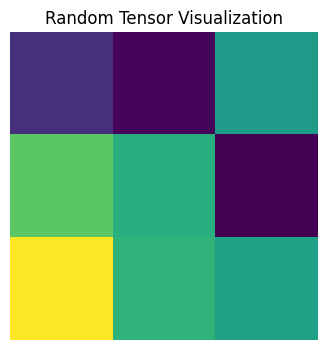

In [ ]:
# Visualizing tensors
plt.figure(figsize=(4, 4))
plt.imshow(tensor.numpy()[0], cmap='viridis')
plt.title("Random Tensor Visualization")
plt.axis('off')
plt.show()

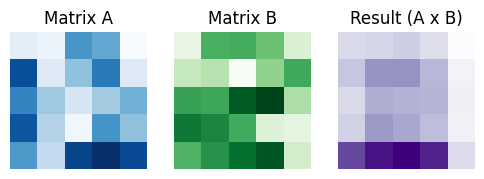

In [ ]:
# Matrix multiplication visualization
A = torch.rand(5, 5)
B = torch.rand(5, 5)
result = torch.matmul(A, B)
plt.figure(figsize=(6, 3))
plt.subplot(1, 3, 1)
plt.imshow(A.numpy(), cmap='Blues')
plt.title("Matrix A")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(B.numpy(), cmap='Greens')
plt.title("Matrix B")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(result.numpy(), cmap='Purples')
plt.title("Result (A x B)")
plt.axis('off')
plt.show()

In [ ]:
# Basic operations
add = vector + 10
sub = vector - 2
mul = vector * 3
div = vector / 2

print("Addition:", add.numpy())
print("Subtraction:", sub.numpy())
print("Multiplication:", mul.numpy())
print("Division:", div.numpy())

Addition: [11. 12. 13.]
Subtraction: [-1.  0.  1.]
Multiplication: [3. 6. 9.]
Division: [0.5 1.  1.5]


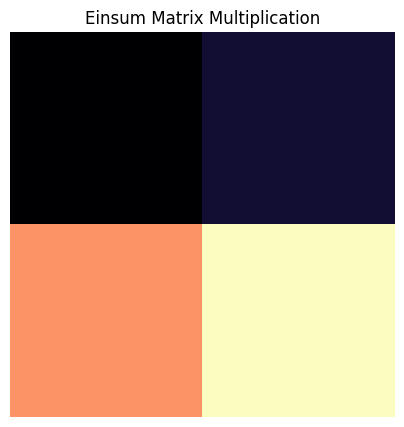

In [ ]:
# Einsum operations
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)
einsum_matrix_multiplication = torch.einsum('ij,jk->ik', x, y)
plt.figure(figsize=(5, 5))
plt.imshow(einsum_matrix_multiplication.numpy(), cmap='magma')
plt.title("Einsum Matrix Multiplication")
plt.axis('off')
plt.show()

In [ ]:
# Advanced einsum operations
einsum_sum = torch.einsum('ij->', x)
einsum_elementwise = torch.einsum('ij,ij->ij', x, y)
einsum_outer = torch.einsum('i,j->ij', vector, vector)

print("Einsum Summation:", einsum_sum.numpy())
print("Einsum Element-wise Multiplication:\n", einsum_elementwise.numpy())
print("Einsum Outer Product:\n", einsum_outer.numpy())

In [ ]:
# Using einops for tensor manipulations
# Rearrange tensor dimensions
rearranged_tensor = rearrange(tensor, 'b h w -> h w b')
print("Rearranged Tensor Shape:", rearranged_tensor.shape)

In [ ]:
# Reduce tensor dimensions
reduced_tensor = reduce(tensor, 'b h w -> b h', 'mean')
print("Reduced Tensor Shape:", reduced_tensor.shape)

Reduced Tensor Shape: torch.Size([3, 3])


In [ ]:
# Repeat tensor along new dimensions
repeated_tensor = repeat(vector, 'h -> h w', w=3)
print("Repeated Tensor Shape:", repeated_tensor.shape)

Repeated Tensor Shape: torch.Size([3, 3])


In [ ]:
# Advanced operations
reshaped_tensor = tensor.view(9, 3)
sliced_tensor = tensor[:, :2, :]
concatenated_tensor = torch.cat([matrix, matrix], dim=0)
stacked_tensor = torch.stack([matrix, matrix], dim=0)

eye_matrix = torch.eye(3)
diag_matrix = torch.diag(torch.tensor([1, 2, 3], dtype=torch.float64))
trace_val = torch.trace(matrix)

tensor_norm = torch.norm(matrix)
rank_tensor = len(matrix.shape)

eigenvalues, eigenvectors = torch.linalg.eig(torch.tensor([[6., 2.], [2., 3.]]))

print("Reshaped Tensor Shape:", reshaped_tensor.shape)
print("Sliced Tensor Shape:", sliced_tensor.shape)
print("Concatenated Tensor Shape:", concatenated_tensor.shape)
print("Stacked Tensor Shape:", stacked_tensor.shape)
print("Identity Matrix:\n", eye_matrix.numpy())
print("Diagonal Matrix:\n", diag_matrix.numpy())
print("Trace of Matrix:", trace_val.numpy())
print("Tensor Norm:", tensor_norm.numpy())
print("Tensor Rank:", rank_tensor)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Reshaped Tensor Shape: torch.Size([9, 3])
Sliced Tensor Shape: torch.Size([3, 2, 3])
Concatenated Tensor Shape: torch.Size([4, 2])
Stacked Tensor Shape: torch.Size([2, 2, 2])
Identity Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Diagonal Matrix:
 [[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
Trace of Matrix: 5.0
Tensor Norm: 5.477225575051661
Tensor Rank: 2
Eigenvalues:
 tensor([7.+0.j, 2.+0.j])
Eigenvectors:
 tensor([[ 0.8944+0.j, -0.4472+0.j],
        [ 0.4472+0.j,  0.8944+0.j]])


In [ ]:
# Broadcasting example
a = torch.tensor([1, 2, 3])
b = torch.tensor([[1], [2], [3]])
broadcast_result = a + b
print("Broadcasting Result:\n", broadcast_result.numpy())

Broadcasting Result:
 [[2 3 4]
 [3 4 5]
 [4 5 6]]


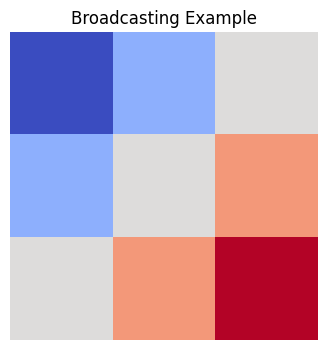

In [ ]:
plt.figure(figsize=(4, 4))
plt.imshow(broadcast_result.numpy(), cmap='coolwarm')
plt.title("Broadcasting Example")
plt.axis('off')
plt.show()

In [ ]:
# Gradient computation
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2 + 3 * x + 5
y.backward()
gradient = x.grad
print("Gradient dy/dx:", gradient.numpy())

Gradient dy/dx: 9.0
